In [1]:
import pandas as pd  #import pandas

In [2]:
df_user = pd.read_excel("User.xlsx") #reading excel file

In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserId       33530 non-null  int64  
 1   ContinentId  33530 non-null  int64  
 2   RegionId     33530 non-null  int64  
 3   CountryId    33530 non-null  int64  
 4   CityId       33526 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.3 MB


In [4]:
print(df_user.nunique()) #Get Unique Values Count for Each Column

UserId         33530
ContinentId        5
RegionId          22
CountryId        153
CityId          5545
dtype: int64


In [5]:
users = pd.read_excel("User.xlsx")
continents = pd.read_excel("Continent.xlsx")
regions = pd.read_excel("Region.xlsx")
countries = pd.read_excel("Country.xlsx")
cities = pd.read_excel("City.xlsx")

df_user_merged = (users
          .merge(continents, on="ContinentId", how="left")
          .merge(regions, on="RegionId", how="left")
          .merge(countries, on="CountryId", how="left")
          .merge(cities, on="CityId", how="left"))



Why does this happen for Continent, Region, Country?
Your left DataFrame already had ContinentId, RegionId, CountryId

Your right lookup tables also had ContinentId, RegionId, CountryId

Result: _x and _y suffixes for all IDs.

In [6]:
df_user_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UserId         33530 non-null  int64  
 1   ContinentId_x  33530 non-null  int64  
 2   RegionId_x     33530 non-null  int64  
 3   CountryId_x    33530 non-null  int64  
 4   CityId         33526 non-null  float64
 5   Continent      33530 non-null  object 
 6   Region         33530 non-null  object 
 7   ContinentId_y  33530 non-null  int64  
 8   Country        33530 non-null  object 
 9   RegionId_y     33530 non-null  int64  
 10  CityName       33526 non-null  object 
 11  CountryId_y    33526 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 3.1+ MB


In [7]:
df_user_merged.head()

,UserId,ContinentId_x,RegionId_x,CountryId_x,CityId,Continent,Region,ContinentId_y,Country,RegionId_y,CityName,CountryId_y
0,14,5,20,155,220.0,Europe,Southern Europe,5,Portugal,20,Lagos,27.0
1,16,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0
2,20,4,15,109,4303.0,Australia & Oceania,Australia,4,Australia,15,Gold Coast,109.0
3,23,1,4,22,154.0,Africa,Southern Africa,1,South Africa,4,Meyerton,22.0
4,25,3,14,101,3098.0,Asia,South East Asia,3,Indonesia,14,Jakarta,101.0


In [8]:
df_clean_user = df_user_merged.drop(columns=[
    'ContinentId_x', 'RegionId_x', 'CountryId_x',
    'ContinentId_y', 'RegionId_y', 'CountryId_y' , 'CityId'
])

In [9]:
df_clean_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   UserId     33530 non-null  int64 
 1   Continent  33530 non-null  object
 2   Region     33530 non-null  object
 3   Country    33530 non-null  object
 4   CityName   33526 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


In [10]:
df_clean_user['Continent'] = df_clean_user['Continent'].astype('category')
df_clean_user['Region'] = df_clean_user['Region'].astype('category')
df_clean_user['Country'] = df_clean_user['Country'].astype('category')
df_clean_user['CityName'] = df_clean_user['CityName'].astype('category')

In [11]:
df_clean_user.head()

,UserId,Continent,Region,Country,CityName
0,14,Europe,Southern Europe,Portugal,Lagos
1,16,Asia,South East Asia,Indonesia,Jakarta
2,20,Australia & Oceania,Australia,Australia,Gold Coast
3,23,Africa,Southern Africa,South Africa,Meyerton
4,25,Asia,South East Asia,Indonesia,Jakarta


## Df for transaction

In [12]:
df_transaction = pd.read_excel("Transaction.xlsx") #reading excel file

In [13]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   TransactionId  52930 non-null  int64
 1   UserId         52930 non-null  int64
 2   VisitYear      52930 non-null  int64
 3   VisitMonth     52930 non-null  int64
 4   VisitMode      52930 non-null  int64
 5   AttractionId   52930 non-null  int64
 6   Rating         52930 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


In [14]:
print(df_transaction.nunique()) #Get Unique Values Count for Each Column

TransactionId    52930
UserId           33530
VisitYear           10
VisitMonth          12
VisitMode            5
AttractionId        30
Rating               5
dtype: int64


In [15]:
attractions_df = pd.read_excel("Attraction.xlsx")

In [16]:
df_transaction = df_transaction.merge(
    attractions_df[['AttractionId', 'Attraction']],   # Only AttractionId and Attraction
    on='AttractionId',
    how='left'
)

In [17]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,Attraction
0,3,70456,2022,10,2,640,5,Sacred Monkey Forest Sanctuary
1,8,7567,2022,10,4,640,5,Sacred Monkey Forest Sanctuary
2,9,79069,2022,10,3,640,5,Sacred Monkey Forest Sanctuary
3,10,31019,2022,10,3,640,3,Sacred Monkey Forest Sanctuary
4,15,43611,2022,10,2,640,3,Sacred Monkey Forest Sanctuary


In [18]:
df_transaction['VisitYear_cat'] = df_transaction['VisitYear'].astype('category')

In [19]:
import calendar

# Step 1: Create the month name column
df_transaction['VisitMonth_name'] = df_transaction['VisitMonth'].astype(int).apply(
    lambda x: calendar.month_abbr[x]
)

# Step 2: Convert to category type
df_transaction['VisitMonth_name'] = df_transaction['VisitMonth_name'].astype('category')


In [20]:
df_transaction['Attraction'] = df_transaction['Attraction'].astype('category')

In [21]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,Attraction,VisitYear_cat,VisitMonth_name
0,3,70456,2022,10,2,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
1,8,7567,2022,10,4,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
2,9,79069,2022,10,3,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
3,10,31019,2022,10,3,640,3,Sacred Monkey Forest Sanctuary,2022,Oct
4,15,43611,2022,10,2,640,3,Sacred Monkey Forest Sanctuary,2022,Oct


In [22]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52930 non-null  int64   
 1   UserId           52930 non-null  int64   
 2   VisitYear        52930 non-null  int64   
 3   VisitMonth       52930 non-null  int64   
 4   VisitMode        52930 non-null  int64   
 5   AttractionId     52930 non-null  int64   
 6   Rating           52930 non-null  int64   
 7   Attraction       52930 non-null  category
 8   VisitYear_cat    52930 non-null  category
 9   VisitMonth_name  52930 non-null  category
dtypes: category(3), int64(7)
memory usage: 3.0 MB


In [23]:
visit_mode_map = {
    0: 'Other',
    1: 'Business',
    2: 'Couples',
    3: 'Family',
    4: 'Friends',
    5: 'Solo'
}


In [24]:
df_transaction['VisitMode'] = df_transaction['VisitMode'].map(visit_mode_map)

In [25]:
df_transaction['VisitMode'] = df_transaction['VisitMode'].astype('category')

In [26]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52930 non-null  int64   
 1   UserId           52930 non-null  int64   
 2   VisitYear        52930 non-null  int64   
 3   VisitMonth       52930 non-null  int64   
 4   VisitMode        52930 non-null  category
 5   AttractionId     52930 non-null  int64   
 6   Rating           52930 non-null  int64   
 7   Attraction       52930 non-null  category
 8   VisitYear_cat    52930 non-null  category
 9   VisitMonth_name  52930 non-null  category
dtypes: category(4), int64(6)
memory usage: 2.6 MB


In [27]:
df_transaction['AttractionId'] = df_transaction['AttractionId'].astype('category')

In [28]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52930 entries, 0 to 52929
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52930 non-null  int64   
 1   UserId           52930 non-null  int64   
 2   VisitYear        52930 non-null  int64   
 3   VisitMonth       52930 non-null  int64   
 4   VisitMode        52930 non-null  category
 5   AttractionId     52930 non-null  category
 6   Rating           52930 non-null  int64   
 7   Attraction       52930 non-null  category
 8   VisitYear_cat    52930 non-null  category
 9   VisitMonth_name  52930 non-null  category
dtypes: category(5), int64(5)
memory usage: 2.3 MB


In [29]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,Attraction,VisitYear_cat,VisitMonth_name
0,3,70456,2022,10,Couples,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
1,8,7567,2022,10,Friends,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
2,9,79069,2022,10,Family,640,5,Sacred Monkey Forest Sanctuary,2022,Oct
3,10,31019,2022,10,Family,640,3,Sacred Monkey Forest Sanctuary,2022,Oct
4,15,43611,2022,10,Couples,640,3,Sacred Monkey Forest Sanctuary,2022,Oct


join df_transcation and df_clean_user

In [30]:
df_joined = df_transaction.merge(df_clean_user, on="UserId", how="left")

In [31]:
df_joined.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,Attraction,VisitYear_cat,VisitMonth_name,Continent,Region,Country,CityName
0,3,70456,2022,10,Couples,640,5,Sacred Monkey Forest Sanctuary,2022,Oct,Europe,Western Europe,United Kingdom,Guildford
1,8,7567,2022,10,Friends,640,5,Sacred Monkey Forest Sanctuary,2022,Oct,America,Northern America,Canada,Ontario
2,9,79069,2022,10,Family,640,5,Sacred Monkey Forest Sanctuary,2022,Oct,America,South America,Brazil,Brazil
3,10,31019,2022,10,Family,640,3,Sacred Monkey Forest Sanctuary,2022,Oct,Europe,Central Europe,Switzerland,Zurich
4,15,43611,2022,10,Couples,640,3,Sacred Monkey Forest Sanctuary,2022,Oct,Europe,Western Europe,United Kingdom,Manchester


In [32]:
#dropping  rows with NAN values and reseting  index
df_joined = df_joined.dropna(subset=['CityName']).reset_index(drop=True)

In [33]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52922 non-null  int64   
 1   UserId           52922 non-null  int64   
 2   VisitYear        52922 non-null  int64   
 3   VisitMonth       52922 non-null  int64   
 4   VisitMode        52922 non-null  category
 5   AttractionId     52922 non-null  category
 6   Rating           52922 non-null  int64   
 7   Attraction       52922 non-null  category
 8   VisitYear_cat    52922 non-null  category
 9   VisitMonth_name  52922 non-null  category
 10  Continent        52922 non-null  category
 11  Region           52922 non-null  category
 12  Country          52922 non-null  category
 13  CityName         52922 non-null  category
dtypes: category(9), int64(5)
memory usage: 2.8 MB


In [35]:
df_joined.to_excel("df_joined.xlsx", index=False)

In [ ]:
#check for duplicate rows and drop it
duplicates = df_joined[df_joined.duplicated()]
print(duplicates)
print(f"Number of duplicates: {duplicates.shape[0]}")

Empty DataFrame
Columns: [TransactionId, UserId, VisitYear, VisitMonth, VisitMode, AttractionId, Rating, Attraction, VisitYear_cat, VisitMonth_name, Continent, Region, Country, CityName]
Index: []
Number of duplicates: 0


In [ ]:
unique_counts = df_joined.nunique()
print(unique_counts)

TransactionId      52922
UserId             33526
VisitYear             10
VisitMonth            12
VisitMode              5
AttractionId          30
Rating                 5
Attraction            30
VisitYear_cat         10
VisitMonth_name       12
Continent              5
Region                22
Country              153
CityName            5545
dtype: int64


In [ ]:
# Get frequency counts for each city
city_freq = df_joined['CityName'].value_counts()

# Map frequency to a new column
df_joined['CityName_freq'] = df_joined['CityName'].map(city_freq)

# Drop the original CityName column if needed
#df_joined = df_joined.drop(columns=['CityName'])


In [ ]:
print(df_joined[['CityName_freq']].head())

   CityName_freq
0             40
1             11
2              3
3             80
4            204


In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52922 non-null  int64   
 1   UserId           52922 non-null  int64   
 2   VisitYear        52922 non-null  int64   
 3   VisitMonth       52922 non-null  int64   
 4   VisitMode        52922 non-null  category
 5   AttractionId     52922 non-null  category
 6   Rating           52922 non-null  int64   
 7   Attraction       52922 non-null  category
 8   VisitYear_cat    52922 non-null  category
 9   VisitMonth_name  52922 non-null  category
 10  Continent        52922 non-null  category
 11  Region           52922 non-null  category
 12  Country          52922 non-null  category
 13  CityName         52922 non-null  category
 14  CityName_freq    52922 non-null  int64   
dtypes: category(9), int64(6)
memory usage: 3.2 MB


## EDA-Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt

# Group by VisitYear and count trips
trips_per_year = df_joined.groupby('VisitYear')['TransactionId'].count()



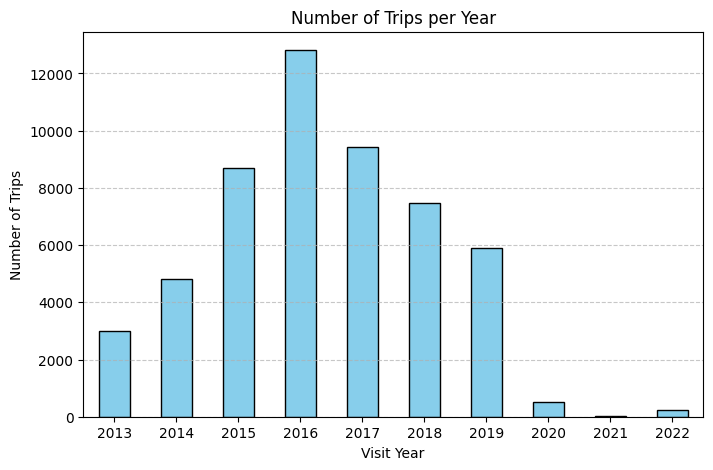

In [ ]:
plt.figure(figsize=(8,5))
trips_per_year.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Trips per Year')
plt.xlabel('Visit Year')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Group by VisitYear and VisitMonth, count trips
trips_per_month_year = (
    df_joined.groupby(['VisitYear', 'VisitMonth'])['TransactionId']
    .count()
    .reset_index()
)

print(trips_per_month_year.head())


   VisitYear  VisitMonth  TransactionId
0       2013           1            207
1       2013           2            186
2       2013           3            238
3       2013           4            222
4       2013           5            242


In [ ]:
# Pivot table for easy plotting (years as rows, months as columns)
pivot_data = trips_per_month_year.pivot(
    index='VisitYear', columns='VisitMonth', values='TransactionId'
)



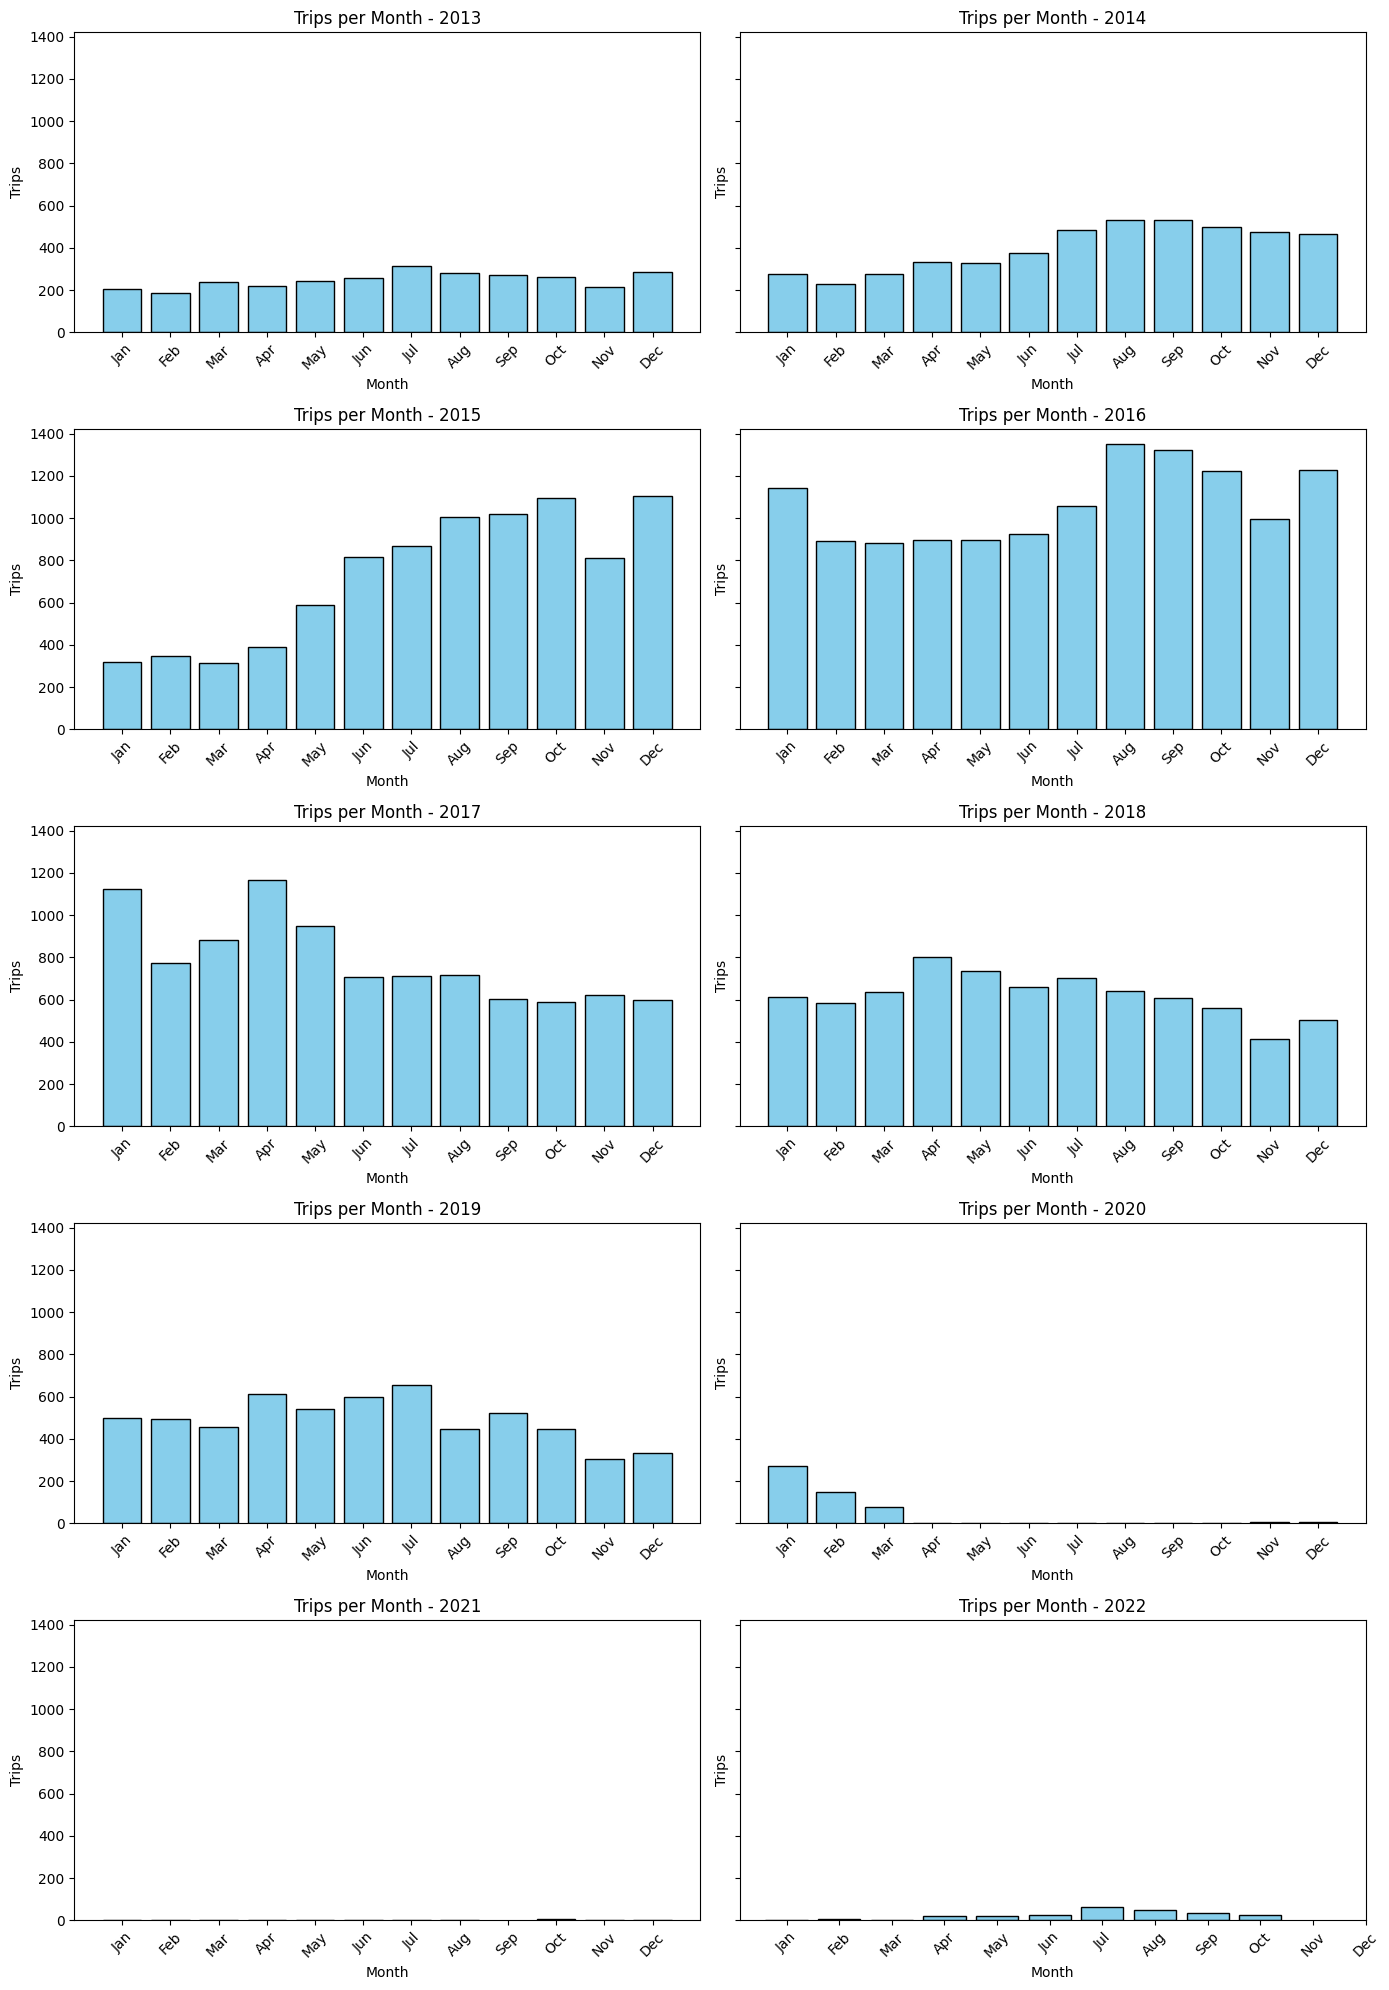

In [ ]:
# Group by year and month
trips_per_month_year = (
    df_joined.groupby(['VisitYear', 'VisitMonth'])['TransactionId']
    .count()
    .reset_index()
)

# Get unique years
years = trips_per_month_year['VisitYear'].unique()

# Create grid of subplots
rows = (len(years) + 1) // 2  # 2 columns grid
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 4), sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter data for each year
    data = trips_per_month_year[trips_per_month_year['VisitYear'] == year]
    
    axes[i].bar(data['VisitMonth'], data['TransactionId'], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Trips per Month - {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Trips')
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# Hide any empty axes (if number of years is odd)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
top_places = df_joined['Attraction'].value_counts().head(10)
print(top_places)

Attraction
Sacred Monkey Forest Sanctuary    13197
Waterbom Bali                      6429
Tegalalang Rice Terrace            5811
Uluwatu Temple                     3359
Tanah Lot Temple                   3352
Sanur Beach                        3043
Seminyak Beach                     2912
Kuta Beach - Bali                  2765
Merapi Volcano                     2235
Tegenungan Waterfall               2190
Name: count, dtype: int64


In [ ]:
# Filter rows for Sacred Monkey Forest Sanctuary
filtered_data = df_joined[df_joined['Attraction'] == 'Sacred Monkey Forest Sanctuary']

# Group by continent and count
continent_distribution = filtered_data['Continent'].value_counts()

print(continent_distribution)

Continent
Europe                 4153
Australia & Oceania    3607
America                2736
Asia                   2460
Africa                  241
Name: count, dtype: int64


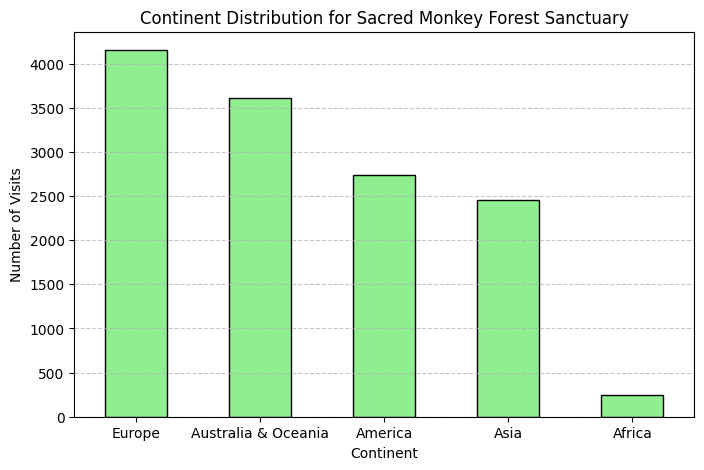

In [ ]:
plt.figure(figsize=(8,5))
continent_distribution.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Continent Distribution for Sacred Monkey Forest Sanctuary')
plt.xlabel('Continent')
plt.ylabel('Number of Visits')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Group by VisitMonth and count trips
trips_per_month = df_joined.groupby('VisitMonth')['TransactionId'].count()

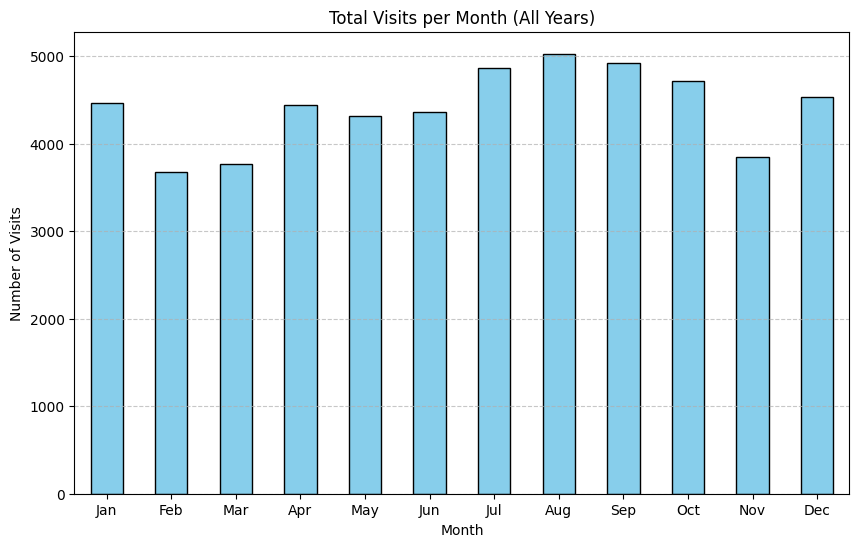

In [ ]:
plt.figure(figsize=(10,6))
trips_per_month.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Visits per Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(
    ticks=range(0,12),
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=0
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52922 non-null  int64   
 1   UserId           52922 non-null  int64   
 2   VisitYear        52922 non-null  int64   
 3   VisitMonth       52922 non-null  int64   
 4   VisitMode        52922 non-null  category
 5   AttractionId     52922 non-null  category
 6   Rating           52922 non-null  int64   
 7   Attraction       52922 non-null  category
 8   VisitYear_cat    52922 non-null  category
 9   VisitMonth_name  52922 non-null  category
 10  Continent        52922 non-null  category
 11  Region           52922 non-null  category
 12  Country          52922 non-null  category
 13  CityName         52922 non-null  category
 14  CityName_freq    52922 non-null  int64   
dtypes: category(9), int64(6)
memory usage: 3.2 MB


ML Exploration

baseline model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [ ]:
# 1. Define target & features
# -------------------
target = "Rating"

X_features = [
    "VisitMode",
    "Attraction",
    "Continent",
    "Region",
    "Country",
    "CityName"
]

In [ ]:
cat_features = X_features  # all are categorical

In [ ]:
# 2. Train/test split
# -------------------
X = df_joined[X_features]
y = df_joined[target]

In [ ]:
# -------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 3. Preprocessor
# -------------------
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cat_features)
    ]
)

In [ ]:
# 4. Pipeline
# -------------------
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [ ]:
# 5. Train model
# -------------------
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['VisitMode', 'Attraction',
                                                   'Continent', 'Region',
                                                   'Country', 'CityName'])])),
                ('regressor', LinearRegression())])

In [ ]:
score = model.score(X_test, y_test)
print(f"R² score: {score:.4f}")

R² score: 0.0255


just raw features brings no advantage to the model, lets try to re-engineer the features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# 1. Create aggregated features
# -------------------
df = df_joined

In [ ]:
# User-based features
user_avg = df.groupby("UserId")["Rating"].mean().rename("User_AvgRating")
user_total = df.groupby("UserId")["Rating"].count().rename("User_TotalTrips")

In [ ]:
# Attraction-based features
attr_avg = df.groupby("AttractionId")["Rating"].mean().rename("Attraction_AvgRating")
attr_total = df.groupby("AttractionId")["Rating"].count().rename("Attraction_TotalTrips")

C:\Users\Boobalan\AppData\Local\Temp\ipykernel_16432\1645655769.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attr_avg = df.groupby("AttractionId")["Rating"].mean().rename("Attraction_AvgRating")
C:\Users\Boobalan\AppData\Local\Temp\ipykernel_16432\1645655769.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attr_total = df.groupby("AttractionId")["Rating"].count().rename("Attraction_TotalTrips")


In [ ]:
# 2. Define features & target
# -------------------
target = "Rating"
X_features = [
    "User_AvgRating",
    "User_TotalTrips",
    "Attraction_AvgRating",
    "Attraction_TotalTrips"
]

In [ ]:
X = df[X_features]
y = df[target]

In [ ]:
# 3. Train/test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 4. Train model (Random Forest)
# -------------------
model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [ ]:
# 5. Evaluate
# -------------------
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R² score: {score:.4f}")

R² score: 0.7213


In [ ]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   TransactionId    52922 non-null  int64   
 1   UserId           52922 non-null  int64   
 2   VisitYear        52922 non-null  int64   
 3   VisitMonth       52922 non-null  int64   
 4   VisitMode        52922 non-null  category
 5   AttractionId     52922 non-null  category
 6   Rating           52922 non-null  int64   
 7   Attraction       52922 non-null  category
 8   VisitYear_cat    52922 non-null  category
 9   VisitMonth_name  52922 non-null  category
 10  Continent        52922 non-null  category
 11  Region           52922 non-null  category
 12  Country          52922 non-null  category
 13  CityName         52922 non-null  category
 14  CityName_freq    52922 non-null  int64   
dtypes: category(9), int64(6)
memory usage: 3.2 MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52922 entries, 0 to 52921
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   TransactionId          52922 non-null  int64   
 1   UserId                 52922 non-null  int64   
 2   VisitYear              52922 non-null  int64   
 3   VisitMonth             52922 non-null  int64   
 4   VisitMode              52922 non-null  category
 5   AttractionId           52922 non-null  category
 6   Rating                 52922 non-null  int64   
 7   Attraction             52922 non-null  category
 8   VisitYear_cat          52922 non-null  category
 9   VisitMonth_name        52922 non-null  category
 10  Continent              52922 non-null  category
 11  Region                 52922 non-null  category
 12  Country                52922 non-null  category
 13  CityName               52922 non-null  category
 14  CityName_freq          52922 non-null 

In [ ]:
# -------------------
# 1. Define features
# -------------------
num_features = [
    "User_AvgRating",
    "User_TotalTrips",
    "Attraction_AvgRating",
    "Attraction_TotalTrips"
]

cat_features = [
    "VisitMode",
    "Continent",
    "Region"
]

target = "Rating"

In [ ]:
# -------------------
# 2. Train/test split
# -------------------
X = df[num_features + cat_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# -------------------
# 3. Preprocessing
# -------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)


In [ ]:
# -------------------
# 4. Pipeline
# -------------------
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", LinearRegression())
    ]
)

In [ ]:
# -------------------
# 5. Train & Evaluate
# -------------------
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R² score: {score:.4f}")

R² score: 0.7335


polynomial

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# -------------------
# 1. Select features
# -------------------
features = [
    "User_AvgRating",
    "User_TotalTrips",
    "Attraction_AvgRating",
    "Attraction_TotalTrips"
]

target = "Rating"

In [ ]:
X = df[features]
y = df[target]

In [ ]:
# -------------------
# 2. Train/test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# -------------------
# 3. Polynomial Regression pipeline
# -------------------
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", LinearRegression())
])

In [ ]:
# -------------------
# 4. Train model
# -------------------
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('regressor', LinearRegression())])

In [ ]:
# -------------------
# 5. Evaluate
# -------------------
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

print(f"R² score: {score:.4f}")


R² score: 0.7366


In [ ]:
import pandas as pd

# Assuming your dataframe is named df
selected_columns = [
    "User_AvgRating",
    "User_TotalTrips",
    "Attraction_AvgRating",
    "Attraction_TotalTrips",
    "Rating"  # include target
]

# Subset dataframe
df_subset = df[selected_columns]

# Compute correlation matrix
correlation_matrix = df_subset.corr()

# Display the matrix
print(correlation_matrix)


                       User_AvgRating  User_TotalTrips  Attraction_AvgRating  \
User_AvgRating               1.000000        -0.034526              0.260872   
User_TotalTrips             -0.034526         1.000000             -0.063882   
Attraction_AvgRating         0.260872        -0.063882              1.000000   
Attraction_TotalTrips        0.102258        -0.104324              0.403215   
Rating                       0.853837        -0.029480              0.301915   

                       Attraction_TotalTrips    Rating  
User_AvgRating                      0.102258  0.853837  
User_TotalTrips                    -0.104324 -0.029480  
Attraction_AvgRating                0.403215  0.301915  
Attraction_TotalTrips               1.000000  0.121737  
Rating                              0.121737  1.000000  


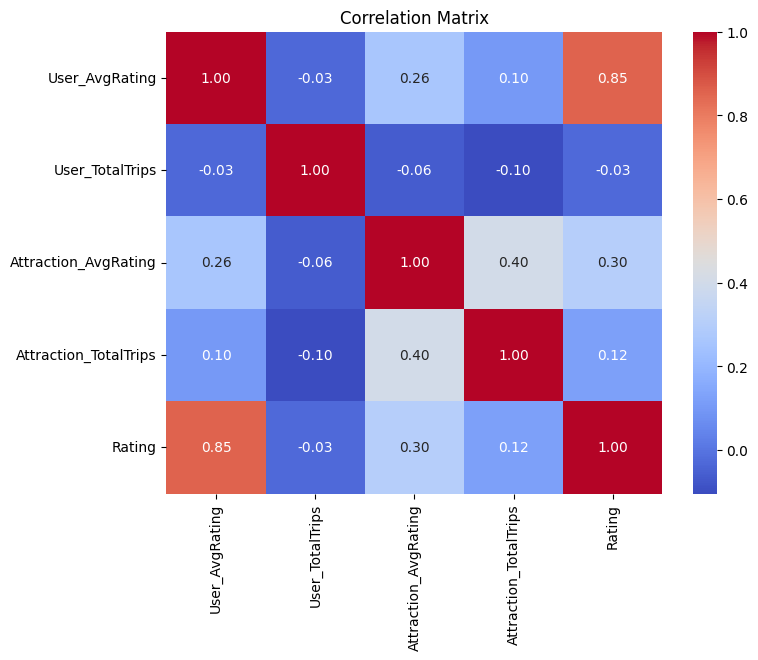

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Select the single feature and target
X = df[["User_AvgRating"]]   # feature
y = df["Rating"]             # target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 6: Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for User_AvgRating: {model.coef_[0]:.2f}")


R² Score: 0.7272
Mean Squared Error: 0.2592
Intercept: 0.00
Coefficient for User_AvgRating: 1.00


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Step 1: Select the single feature and target
X = df[["User_AvgRating", "Attraction_AvgRating"]]
y = df["Rating"]             # target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 6: Print Results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for User_AvgRating: {model.coef_[0]:.2f}")


R² Score: 0.7333
Mean Squared Error: 0.2534
Intercept: -1.07
Coefficient for User_AvgRating: 0.97
